We need to import tensorflow

In [2]:
import tensorflow as tf

The fashion_mnist dataset is comes with keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

# Splitting
Splitting into training and testing(images, labels) 

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 217 123   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8   1   0  14 200 202 183 237 165  85  24   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0 189 221 178 

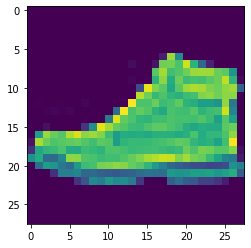

In [9]:
# To show the image
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
INDEX = 89 # Change it
plt.imshow(training_images[INDEX]) # The actual image
print(training_labels[INDEX]) # The label of the image (1 to 10)
print(training_images[INDEX]) # The array representation of the pic

### Normalizing
For couple of reason the neural network needs the images in normalized form means 0 to 1 value
did you notice tht values in the array represntation, all between 0 to 255
so if the value is 215 then normalized is "215/255.0 = 0.8431372549019608"
we need to normalize all the value in 1 image and several images in  training_images
python makes this simple

In [10]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Model
Lets create our model

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Here,
**Sequential**:It simply means sequence of layers
**Flatten**:It makes the array flat(1 dimensional set)
**Dense**:A layer of neuron
    Each layer of neurons need an activation function to tell then what to do
**Relu**:Simply "IF x>0 return x, else return 0" So the value from this is 0 or greater than 0
**Softmax**:Takes a set of values, it picks the biggest one and 
makes the set true or false (0,1), The biggest one should have the value 1
    For example set = [0.5,0.1,0.67,0.12,0.34], The output be like [0,0,1,0,0]

### Compiling and fitting
our model is ready for compiling
we compile the model with optimizer and loss function etc.
Then we fit the model means trains the model to catch the patterns of training_images according to labels and given parameters

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8263
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8657
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8753
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8859
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2684 - accuracy: 0.9008
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9042
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9074
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

The accuracy is 93% for me 

In [13]:
# Let's predict all the test_images and check it's accuracy
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8834


[0.36443883180618286, 0.883400022983551]

In [14]:
classifications = model.predict(test_images)

In [15]:
index = 0
print(classifications[index])
print(f'Predicted label is : {np.argmax(classifications[index])}')
print(f'Actual label is : {test_labels[index]}')

[9.3667400e-12 1.1415671e-12 2.7287106e-09 3.0694054e-13 1.8169773e-10 2.8693119e-06 3.3638186e-09 4.2376900e-03 1.5848857e-11 9.9575943e-01]
Predicted label is : 9
Actual label is : 9
